<a href="https://colab.research.google.com/github/SkourtsidisGiorgos/NTUA-Helpers/blob/main/Control_Theory_NTUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Εισαγωγή

Το παρόν notebook αποτελεί βοήθημα για λύση θεμάτων εξεταστικής στα ΣΑΕ 5ου εξαμήνου της σχολής ΗΜΜΥ. Αρχικά πρέπει να τρέξεις τα κελιά που κάνουν τα απαραίτητα installs και Imports. Στη συνέχεια επιλέγεις ένα κελί που θές να τρέξεις. Σε κάθε κελί υπάρχουν καθοδηγητικά σχόλια για το που πρέπει να ορίσεις τις μεταβλητές/πίνακες. 

To be implemented:
- Βήματα για το ΓΤΡ με αυτόματο τρόπο
- Fix μετασχηματισμός ομοιότητας (χάλασε με κάποιο update βιβλιοθηκών)
- Διακριτός Lyapunov - απόξειξη συνάρτησης
- $|z| < α_i$, όπου $α_i$ είναι είναι μια σταθερά. (Πρέπει να γίνουν μετασχηματισμοί και μετά το κριτήριο Routh)

<h2>ΠΡΟΣΟΧΗ</h2>

- Ενδεχεται κάποια κομμάτια κώδικα να μην λειτουργούν όπως πρέπει, καθώς τα πακέτα κάνουν συνεχώς updates και δεν αποθήκευσα τις συγκεκριμένες version των βιβλιοθηκών. Αν τα αποτελέσματα που βλέπεις στα κελιά διαφέρουν απο αυτά που παίρνεις σημαίνει πως ο κώδικας χρειάζεται κάποια μικρή τροποποίηση για να είναι και πάλι όπως πριν. 

- Σε πολλά κελιά έχω βάλει τις εντολές σε 1 γραμμή για λόγους σμίκρυσης του notebook. Για να διαβάσεις/επεξεργαστείς τον κώδικα επέξελε ένα ; και μετά πάτα "ctrl + shift + l". Θα επιλεχθούν όλα τα ερωτηματικά στο κελί. Στη συνέχεια πάτα "Enter". Θα εξαφανιστούν τα ερωτηματικά και ο κώδικας θα αποκτήσει την κανονική του μορφή

In [ ]:
!pip install control

     |████████████████████████████████| 266kB 6.1MB/s 
  Created wheel for control: filename=control-0.8.4-py2.py3-none-any.whl size=276947 sha256=725dc2ad0a01ac91f295d64dff1d350a61c5e1c142e0ec79d99a455ed050aa73
  Stored in directory: /root/.cache/pip/wheels/3e/a4/9a/8b6ad43fcb2aba7debf8188b60a3def7aaa9a11582b7929ead
Successfully built control


In [ ]:
from sympy import *
import sympy as sp ; import control ; import  numpy as np
sp.init_printing(use_latex='mathjax');

#Πίνακες

##Eλεγξιμο-Παρατηρήσιμο-Μετακίνηση Πόλων

In [ ]:
# Δε δουλεύει για συμβολα s,t,x κτλπ μόνο νούμερα δυστυχώς (προς το παρόν)
A = [[1,-1],[2,-1]]
B = [[1],[1]]
C = [1,0]
#-------------------------------------------------#
ctrl = control.ctrb(A, B)
obsv = control.obsv(A, C)
print("Πινακας Ελεγξιμότητας:\n",ctrl,"\nΟρίζουσα = ",np.linalg.det(ctrl))
print("\nΠινακας Παρατηρισιμότητας:\n",obsv,"\nΟρίζουσα = ",np.linalg.det(obsv))

Πινακας Ελεγξιμότητας:
 [[1. 0.]
 [1. 1.]] 
Ορίζουσα =  1.0

Πινακας Παρατηρισιμότητας:
 [[ 1.  0.]
 [ 1. -1.]] 
Ορίζουσα =  -1.0


In [ ]:
poles = [0.5,-0.5] # <-επιθυμητοί πόλοι
print(f"Για να μετακινηθούν οι πόλοι στις θέσεις {poles} πρέπει:\nk= [k1 k2] = {control.acker(A, B, poles)} ")

Για να μετακινηθούν οι πόλοι στις θέσεις [0.5, -0.5] πρέπει:
k= [k1 k2] = [[ 1.25 -1.25]] 


##Διαγωνοποίηση

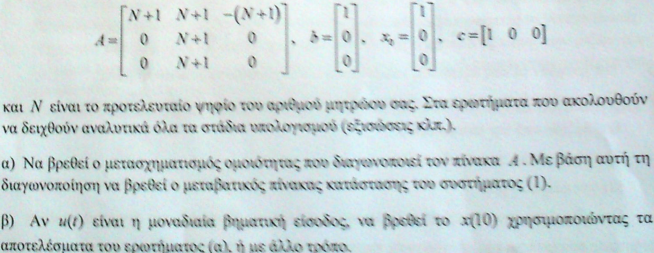

In [ ]:
import sympy as sp;s = sp.symbols("s") ; a = sp.symbols("α") ; b = sp.symbols("β") 
# ------------------------------------------------------#
N=0
A = [[N+1,N+1,-(N+1)], 
     [0,N+1,0], 
     [0,N+1,0]]
# A = [[a+1,0],
#      [1,-1]]
# ------------------------------------------------------#
dim = len(A);sp.init_printing(use_latex='mathjax');M = sp.Matrix(A); S,D = M.diagonalize(); Sinv = S.inv();print("SΛS^-1 =  ");S,D,Sinv

SΛS^-1 =  


⎛                         ⎡ -1     ⎤⎞
⎜                         ⎢─────  1⎥⎟
⎜⎡0  α + 2⎤  ⎡-1    0  ⎤  ⎢α + 2   ⎥⎟
⎜⎢        ⎥, ⎢         ⎥, ⎢        ⎥⎟
⎜⎣1    1  ⎦  ⎣0   α + 1⎦  ⎢  1     ⎥⎟
⎜                         ⎢─────  0⎥⎟
⎝                         ⎣α + 2   ⎦⎠

##$e^{At}$

(συνέχεια απτο πάνω κελί) 

 
Μόνο για συνεχή σύστημα.Αν εισαι σε διακριτό πήγαινε στον $Α^k$


In [ ]:
t = sp.symbols("t")
for i in range(dim):
  for j in range(dim):
    if (i==j):
      D[i,j] = sp.exp(D[i,j]*t)
eAt = S*D*Sinv;print("Λ, e^At ="); D,sp.simplify(eAt)

Λ, e^At =


⎛             ⎡ t   t         t    ⎤⎞
⎜⎡1  0   0 ⎤  ⎢ℯ   ℯ  - 1  - ℯ  + 1⎥⎟
⎜⎢         ⎥  ⎢                    ⎥⎟
⎜⎢    t    ⎥  ⎢       t            ⎥⎟
⎜⎢0  ℯ   0 ⎥, ⎢0     ℯ        0    ⎥⎟
⎜⎢         ⎥  ⎢                    ⎥⎟
⎜⎢        t⎥  ⎢     t              ⎥⎟
⎝⎣0  0   ℯ ⎦  ⎣0   ℯ  - 1     1    ⎦⎠

---
O τύπος είναι: \\
$X(t)=e^{At}X(0)+$$\int_0^{t} e^{A(t-τ)}Β(τ) u(τ)  dτ  $ \\


Βάλε στο $n$ την τιμή του $x_n$ που θες να υπολογίσεις και όρισε κατάλληλα τα B,X0.

Aν ξανατρέξεις κάποιο απτα κελιά πρεπει να το πάρεις απ'την αρχη : διαγωνοποιηση -> $e^{At}$ -> αυτό

In [ ]:
X0 = [[1,0,0]]
B = [[1,0,0]]
u = 2
n=10
#---------------------------------------------------------#
from copy import deepcopy;X0 = sp.Matrix(X0);B = sp.Matrix(B);X0=X0.T;B=B.T;taf = sp.symbols("τ");eAtaf = deepcopy(eAt);eAtaf = eAtaf.subs(t,t-taf);eAt,eAtaf = eAt.subs(t,n), eAtaf.subs(t,n);eAt*X0+integrate(eAtaf*B*u, (taf,0,n))

⎡        10⎤
⎢-2 + 3⋅ℯ  ⎥
⎢          ⎥
⎢    0     ⎥
⎢          ⎥
⎣    0     ⎦

##$A^k$

Πρεπει να χεις τρέξει πρώτα το κελί που λέγεται "διαγωνοποιηση". Μονο διακριτά συστήματα.
Μη το ξανατρεξεις, καθε φορα κανει υψωση σε δυναμη.Πρωτα το  κελί διαγωνοποιηση και μετα αυτό. \\
Αν εχεις τρεξει το e^At κελι δε θα δουλέψει το Α^k

In [ ]:
k =sp.symbols('k'); D = sp.MatPow(D,k); Ak = S*D*Sinv; sp.powsimp(Ak)

                     k            
⎡1  1  0⎤ ⎛⎡0  0  0⎤⎞  ⎡0  -1  1 ⎤
⎢       ⎥ ⎜⎢       ⎥⎟  ⎢         ⎥
⎢0  0  1⎥⋅⎜⎢0  1  0⎥⎟ ⋅⎢1  1   -1⎥
⎢       ⎥ ⎜⎢       ⎥⎟  ⎢         ⎥
⎣1  0  1⎦ ⎝⎣0  0  1⎦⎠  ⎣0  1   0 ⎦

Βαλε στο $n$ τον αριθμό $x_n$ που θες να υπολογίσεις

In [ ]:
n=20
X0 = [3,9,4]
B = [3,0,0]
u = 1
#---------------------------------------------------------#
# Change stuff above the line
X0 = sp.Matrix(X0) ; B = sp.Matrix(B); Ak = sp.MatPow(Ak, k).subs({k: n}).doit(); sum = sp.Matrix([0,0,0])
for i in range(n-1):
  sum+=sp.MatPow(Ak,n-i-1)*B*u
X = Ak*X0 + sum; print(f"X({n})= A^k *X(0) +SUM(A^(k-i-1)*B*u)=");X

X(20)= A^k *X(0) +SUM(A^(k-i-1)*B*u)=


⎡65⎤
⎢  ⎥
⎢9 ⎥
⎢  ⎥
⎣9 ⎦

##Αντίστροφος Πίνακας calculator

In [ ]:
s = sp.symbols("s") ; a = sp.symbols("α") ; b = sp.symbols("β") 
A = sp.Matrix([[s-1,1,-1],
                [0,s-1,0],
                [0,1,s]]) # <- write here the array

sp.simplify(A.inv())

⎡  1    -(s + 1)        1    ⎤
⎢─────  ──────────  ─────────⎥
⎢s - 1           2  s⋅(s - 1)⎥
⎢       s⋅(s - 1)            ⎥
⎢                            ⎥
⎢           1                ⎥
⎢  0      ─────         0    ⎥
⎢         s - 1              ⎥
⎢                            ⎥
⎢          -1           1    ⎥
⎢  0    ─────────       ─    ⎥
⎣       s⋅(s - 1)       s    ⎦

##Μετασχηματισμός ομοιότητας

Αναμεσα στις πράσινες γραμμές αντικατέστησε όποιο σημείο του αρχικού και τελικού πίνακα B είναι γνωστό.Με bfi τα στοιχεία του τελικού πίνακα Β* ->ΒF (Βfinal). Mε b1,b2 ειναι τα στοιχεια του αρχικού Β. Αν κάτι δεν ειναι γνωστό τοτε βάλε b1, b2, bf1,bf2 αναλογα με το τι λείπει

In [ ]:
import sympy as sym;a11, a12, a21, a22 = sp.symbols("a11 a12 a21 a22");b1, b2 = sp.symbols("b1 b2");t11, t12, t21, t22 = sp.symbols("t11 t12 t21 t22");A = sp.Matrix([[a11,a12],[a21,a22]]) ;B = sp.Matrix([[b1,b2]]).T ; T = sp.Matrix([[t11,t12],[t21,t22]]);af11, af12, af21, af22 = sp.symbols("af11 af12 af21 af22");bf1, bf2 = sp.symbols("bf1 bf2");AF = sp.Matrix([[af11, af12],[af21, af22]]);BF = sp.Matrix([[bf1,bf2]]);BF=BF.T;Tinv = T.inv();expr1=Tinv*B - BF
g = sp.symbols('g')
#-------------------------------------------------------#
Barxikos = [0,-g] # Βάλε τιμη ή βάλε b1,b2 αν δεν ειναι γνωστά
Btelikos = [1,0]  # Βάλε τιμη ή βάλε bf1,bf2 αν δεν ειναι γνωστά
#-------------------------------------------------------#
# Change b1,b3,bf1,bf2 inside the lines
S = Barxikos;F = Btelikos
expr1 = expr1.subs({b1:S[0], b2:S[1], bf1:F[0], bf2:F[1]})
sol1 = sp.solve([expr1], (t11,t12,t21,t22,b1,b2,bf1,bf2)) ; sol1=sol1[0] ; sol1

{t₁₁: 0, t₂₁: -g}

Με afij συμβολίζονται τα στοιχεία του τελικού πίνακα Α* (στον κώδικα ειναι ΑF - Αfinal ).

In [ ]:
Aarxikos = [[0,1],
            [g,0]] # Βάλε τιμη ή βάλε a11,a12,a21,a22 αν κατι δεν ειναι γνωστό
Atelikos = [[-af11,-af12],
            [1,0]] # Βάλε τιμη ή βάλε af11,af12,af21,af22 αν κατι δεν ειναι γνωστό
#-------------------------------------------------------#
# Change b1,b3,bf1,bf2 inside the lines

if (t11 in sol1):t11 = sol1[t11]
if (t12 in sol1):t12 = sol1[t12]
if (t21 in sol1):t21 = sol1[t21]
if (t22 in sol1):t22 = sol1[t22]
S = Aarxikos;F = Atelikos;
T = sp.Matrix([[t11,t12],[t21,t22]])
expr2 = T.inv()*A*T -AF 
expr2 = expr2.subs({a11:S[0][0], a12:S[0][1], a21:S[1][0],a22:S[1][1],
                    af11:F[0][0], af12:F[0][1], af21:F[1][0],af22:F[1][1]})
sol2 = sp.solve([expr2], (t11,t12,t21,t22,af11,af12,af21,af22,a11,a12,a21,a22)) ;sol2

[{0: 0, af₁₁: 0, af₁₂: t₁₂, -g: t₁₂, t₂₂: 0}]

##Συνάρτηση Μεταφοράς

$G(s) = C(sI-A)^-{1} B +D$ \\

ΠΡΟΣΟΧΗ!!
Το D δε το προσθέτω, στο αποτέλεσμα, βάλτο μόνο σου

In [ ]:
import sympy as sp ;s = sp.symbols("s") ; a = sp.symbols("α") ; b = sp.symbols("β") ;

A = [[1,1,-1],
     [0,1,0],
     [0,1,0]]
B = [1,0,0]
C = [1,0,0]
#---------------------------------------------------------#
# Change stuff above the line
A=sp.Matrix(A) ;B=sp.Matrix(B) ;C=sp.Matrix(C) ;C=C.T ;dim = len(B) ;temp =s*sp.eye(dim)-A ;temp = temp.inv() ;G = C*temp*B  ;print("(sI-A)^-1 ,(sI-A)^-1 * B,  G(s)=") ;sp.simplify(temp),sp.simplify(temp)*B,G

(sI-A)^-1 ,(sI-A)^-1 * B,  G(s)=


⎛⎡  1        1         -1    ⎤                   ⎞
⎜⎢─────  ─────────  ─────────⎥                   ⎟
⎜⎢s - 1  s⋅(s - 1)  s⋅(s - 1)⎥  ⎡  1  ⎤          ⎟
⎜⎢                           ⎥  ⎢─────⎥          ⎟
⎜⎢           1               ⎥  ⎢s - 1⎥  ⎡ -1   ⎤⎟
⎜⎢  0      ─────        0    ⎥, ⎢     ⎥, ⎢──────⎥⎟
⎜⎢         s - 1             ⎥  ⎢  0  ⎥  ⎣-s + 1⎦⎟
⎜⎢                           ⎥  ⎢     ⎥          ⎟
⎜⎢           1          1    ⎥  ⎣  0  ⎦          ⎟
⎜⎢  0    ─────────      ─    ⎥                   ⎟
⎝⎣       s⋅(s - 1)      s    ⎦                   ⎠

##$|sI-A|$

Eχεις και 2 σταθερές a,b να χρησιμοποιήσεις αν θες

In [ ]:
import sympy as sp ;s = sp.symbols("s") ;a = sp.symbols("α") ;b = sp.symbols("β") 

A = [[a,1,-1],
     [0,1,0],
     [0,1,0]]
#---------------------------------------------------------#
# Change stuff above the line
dim = len(A) ;A=sp.Matrix(A) ;XE =s*sp.eye(dim)-A ;print("G(s)=") ;sp.simplify(XE.det())

G(s)=


s*(s - 1)*(s - α)

# Lyapunov

## Bρες Lyapunov
Θα γραψουμε και ενδιάμεσα αποτελεσματα σε κάθε κελί

### Συνεχή

$A^{T}*P+PA=-Q, Q=I$

In [ ]:
A = [[-3,-7], [0,-4]]
#-----------------------------------------------#
import sympy as sp
p11, p12, p21, p22 = sp.symbols("p11 p12 p21 p22")
A = sp.Matrix(A)
P = sp.Matrix([[p11,p12],[p21,p22]])
sp.init_printing(use_latex='mathjax')
A.T,P, P,A, -sp.eye(2)

⎛⎡-3  0 ⎤  ⎡p₁₁  p₁₂⎤  ⎡p₁₁  p₁₂⎤  ⎡-3  -7⎤  ⎡-1  0 ⎤⎞
⎜⎢      ⎥, ⎢        ⎥, ⎢        ⎥, ⎢      ⎥, ⎢      ⎥⎟
⎝⎣-7  -4⎦  ⎣p₂₁  p₂₂⎦  ⎣p₂₁  p₂₂⎦  ⎣0   -4⎦  ⎣0   -1⎦⎠

In [ ]:
A.T*P, P*A, sp.eye(2)

⎛⎡    -3⋅p₁₁          -3⋅p₁₂    ⎤  ⎡-3⋅p₁₁  -7⋅p₁₁ - 4⋅p₁₂⎤  ⎡1  0⎤⎞
⎜⎢                              ⎥, ⎢                      ⎥, ⎢    ⎥⎟
⎝⎣-7⋅p₁₁ - 4⋅p₂₁  -7⋅p₁₂ - 4⋅p₂₂⎦  ⎣-3⋅p₂₁  -7⋅p₂₁ - 4⋅p₂₂⎦  ⎣0  1⎦⎠

In [ ]:
a = sp.solve(A.T*P + P*A + sp.eye(2), (p11, p12, p21, p22));a

{p₁₁: 1/6, p₁₂: -1/6, p₂₁: -1/6, p₂₂: 5/12}

In [ ]:
p11 = a[p11]; p12 = a[p12]; p21 = a[p21]; p22 = a[p22];P = sp.Matrix([[p11,p12],[p21,p22]]);x1, x2 = sp.symbols("x1 x2");X = sp.Matrix([[x1,x2]]);V = X*P*X.T;sp.factor(V)

⎡    2                 2⎤
⎢2⋅x₁  - 4⋅x₁⋅x₂ + 5⋅x₂ ⎥
⎢───────────────────────⎥
⎣           12          ⎦

### Διακριτά

$A^{T}PΑ-P=-Q, Q=I$

In [ ]:
A = [[-3,-7], [0,-4]]
#-----------------------------------------------#
import sympy as sp
p11, p12, p21, p22 = sp.symbols("p11 p12 p21 p22")
A = sp.Matrix(A)
P = sp.Matrix([[p11,p12],[p21,p22]])
sp.init_printing(use_latex='mathjax')
A.T,P,A,-P, -sp.eye(2)

⎛⎡-3  0 ⎤  ⎡p₁₁  p₁₂⎤  ⎡-3  -7⎤  ⎡-p₁₁  -p₁₂⎤  ⎡-1  0 ⎤⎞
⎜⎢      ⎥, ⎢        ⎥, ⎢      ⎥, ⎢          ⎥, ⎢      ⎥⎟
⎝⎣-7  -4⎦  ⎣p₂₁  p₂₂⎦  ⎣0   -4⎦  ⎣-p₂₁  -p₂₂⎦  ⎣0   -1⎦⎠

In [ ]:
A.T*P*A,- P,- sp.eye(2)

⎛⎡     9⋅p₁₁                21⋅p₁₁ + 12⋅p₁₂         ⎤  ⎡-p₁₁  -p₁₂⎤  ⎡-1  0 ⎤⎞
⎜⎢                                                  ⎥, ⎢          ⎥, ⎢      ⎥⎟
⎝⎣21⋅p₁₁ + 12⋅p₂₁  49⋅p₁₁ + 28⋅p₁₂ + 28⋅p₂₁ + 16⋅p₂₂⎦  ⎣-p₂₁  -p₂₂⎦  ⎣0   -1⎦⎠

In [ ]:
a = sp.solve(A.T*P*A- P+ sp.eye(2), (p11, p12, p21, p22));a

⎧                21       21       -145 ⎫
⎨p₁₁: -1/8, p₁₂: ──, p₂₁: ──, p₂₂: ─────⎬
⎩                88       88        264 ⎭

In [ ]:
p11 = a[p11]; p12 = a[p12]; p21 = a[p21]; p22 = a[p22];P = sp.Matrix([[p11,p12],[p21,p22]]);x1, x2 = sp.symbols("x1 x2");X = sp.Matrix([[x1,x2]]);V = X*P*X.T;sp.factor(V)

⎡ ⎛     2                     2⎞ ⎤
⎢-⎝33⋅x₁  - 126⋅x₁⋅x₂ + 145⋅x₂ ⎠ ⎥
⎢────────────────────────────────⎥
⎣              264               ⎦

##Γραμμικοποίηση

Κανονική 2019 Θέμα 3 \\
Πρέπει να ορίσεις κατάλληλα τις f,g μέσα στις πράσινες γραμμές. f=x1' και g = x2'


In [ ]:
# Κανονική 2019 Θέμα 3 
import sympy as sp
sp.init_printing(use_latex='mathjax')
x1,x2 = sp.symbols("x1 x2")
#-----------------------------------#
f = x2
g = -x1-pow(x1,2) -x2
#-----------------------------------#
sol = sp.nonlinsolve([f,g], (x1,x2))
print("Σημεία Ισορροπίας:")
sol = list(sol) ; sol

Σημεία Ισορροπίας:


[(-1, 0), (0, 0)]

In [ ]:
s = sp.symbols("s");d = sp.Derivative;A = sp.Matrix([[d(f,x1), d(f,x2)],[d(g,x1), d(g,x2)]]);sI = sp.Matrix([[s,0],[0,s]]);print("A ="); A.doit()

A =


⎡    0      1 ⎤
⎢             ⎥
⎣-2⋅x₁ - 1  -1⎦

In [ ]:
# 1o Σημείο Ισορροπίας 
from copy import deepcopy; p=sol[0] ; A1=deepcopy(A)
A1 = A1.subs({x1: p[0], x2:p[1]}).doit()
a = sp.solve(sp.det(sI-A1),s)
if (sp.re(a[0])>0 or  sp.re(a[1])>0): print("Ασταθές Σημείο Ισορροπίας")
elif (sp.re(a[0])==0 or  sp.re(a[1])==0): print("Λόγω του μηδενικού πόλου δε μπορουμε να αποφανθούμε για την ευστάθεια μέσω γραμμικοποίησης και χρειαζόμαστε συνάρτηση Lyapunov")
else: print("Ευσταθές Σημείο Ισορροπίας")
print(f"A{p}, Πόλοι S1,2 = "); A1,a


Ασταθές Σημείο Ισορροπίας
A(-1, 0), Πόλοι S1,2 = 


⎛⎡0  1 ⎤  ⎡  1   √5    √5   1⎤⎞
⎜⎢     ⎥, ⎢- ─ + ──, - ── - ─⎥⎟
⎝⎣1  -1⎦  ⎣  2   2     2    2⎦⎠

In [ ]:
# 2o Σημείο Ισορροπίας - Aν ΔΕΝ υπάρχει αγνόησε αυτό το κελί
p=sol[1]; A2=deepcopy(A)
A2 = A2.subs({x1: p[0], x2:p[1]}).doit()
a = sp.solve(sp.det(sI-A2),s)
if (sp.re(a[0])>0 or  sp.re(a[1])>0): print("Ασταθές Σημείο Ισορροπίας")
elif (sp.re(a[0])==0 or  sp.re(a[1])==0): print("Λόγω του μηδενικού πόλου δε μπορουμε να αποφανθούμε για την ευστάθεια μέσω γραμμικοποίησης και χρειαζόμαστε συνάρτηση Lyapunov")
else: print("Ευσταθές Σημείο Ισορροπίας")
print(f"A{p}, Πόλοι S1,2 = "); A2,a

Ευσταθές Σημείο Ισορροπίας
A(0, 0), Πόλοι S1,2 = 


⎛⎡0   1 ⎤  ⎡  1   √3⋅ⅈ    1   √3⋅ⅈ⎤⎞
⎜⎢      ⎥, ⎢- ─ - ────, - ─ + ────⎥⎟
⎝⎣-1  -1⎦  ⎣  2    2      2    2  ⎦⎠

##Παραγώγιση Lyapunov

Πρεπει να ορίσεις 3 πραγματα: 

Tα dx1,dx2 που ειναι οι παράγωγοι των x1,x1 και την υποψήφια συνάρτηση lyapunov V



In [ ]:
import sympy as sp;sp.init_printing(use_latex='mathjax');x1,x2,t = sp.symbols("x1 x2 t")
#------------------------------------------#
dx1 = x2
dx2 = -pow(x1,3) - x2
V = pow(x1,4) + pow(x1,2) + 2*x1*x2 + 2*pow(x2,2)
#------------------------------------------#
sp.simplify(sp.diff(V,x1)*dx1 + sp.diff(V,x2)*dx2).doit()

      4       2
- 2⋅x₁  - 2⋅x₂ 

#Aπλοποιηση παράστασης



Για απλοποιήσεις καλύτερα στο https://www.wolframalpha.com/

## Ιm-Re

Bάλε την παράσταση μέσα στις πράσινες γραμμές. Γράψε μόνο τα s, όπου s=jω

In [ ]:
from sympy import symbols,simplify,I; a = symbols("ω",real=True);s = symbols("s")
#------------------------------------------#
expr = (s+1)/((s-1)*(s+2)*(s+4))
#------------------------------------------#
expr = expr.subs(s, a*I);print("Πριν:");expr.doit()

Πριν:


           ⅈ⋅ω + 1           
─────────────────────────────
(ⅈ⋅ω - 1)⋅(ⅈ⋅ω + 2)⋅(ⅈ⋅ω + 4)

In [ ]:
print("Πραγματικό, Φανταστικό μέρος =");simplify(re(expr)).doit(),simplify(im(expr)).doit()

Πραγματικό, Φανταστικό μέρος =


⎛    ⎛ 4      2    ⎞               ⎛   2    ⎞    ⎞
⎜   -⎝ω  + 3⋅ω  + 8⎠          -2⋅ω⋅⎝2⋅ω  + 5⎠    ⎟
⎜───────────────────────, ───────────────────────⎟
⎜ 6       4       2        6       4       2     ⎟
⎝ω  + 21⋅ω  + 84⋅ω  + 64  ω  + 21⋅ω  + 84⋅ω  + 64⎠

## Aπλά κλάσματα

In [ ]:
G = 1/(pow(s,2)*(s+2))
#------------------------------------------#
import sympy as sp; sp.init_printing(use_latex='mathjax')
T = sp.Symbol("T"); s = sp.Symbol("s"); a = sp.Symbol("α")
print("G = ",G,"="); sp.apart(G)

G =  1/(s**2*(s + 2)) =


    1        1     1  
───────── - ─── + ────
4⋅(s + 2)   4⋅s      2
                  2⋅s 

## Απλοποίηση

In [ ]:
import sympy as sp; sp.init_printing(use_latex='mathjax')
T = sp.Symbol("T"); s = sp.Symbol("s"); a = sp.Symbol("α")
#------------------------------------------#
G = (s+1)**2/(())
#------------------------------------------#
sp.simplify(G).doit()

      T⋅α  
   T⋅ℯ     
───────────
 5        2
α ⋅(s - 1) 

# Niquist

## Διερεύνηση

Δώσε τη G(s) και βρες Re,Im και μερικά όρια

Αν θέλεις κάποιο σύμβολο/σταθερά χρησιμοποίησε τις μεταβλητες "n,m,b".Οι n.m είναι θετικές ενώ η b αρνητική. 

In [ ]:
s = sp.Symbol("s")
n,m = sp.symbols("ν μ",positive=True);b = sp.symbols("β",negative=True)
#-----------------------------------------------------#
G = 2/(s*(s+1)*(2*s+1))
#-----------------------------------------------------#
# Give G(s) between the lines
a = sp.symbols("ω",real=True);expr = G.subs(s, a*I);
simp_expr = simplify(re(expr)).doit(),simplify(im(expr)).doit()
a0=list(solveset(simp_expr[0], a))
a1=list(solveset(simp_expr[1], a))
print(f"Για Re=0, ω = {a0}")
print(f"Για Im=0, ω = {a1}")
TomiY=[]
TomiX=[]
for x,item in enumerate(a0):
  TomiY.append(simp_expr[1].subs(a,a0[x]))
for x,item in enumerate(a1):
  TomiX.append(simp_expr[0].subs(a,a1[x]))
print("(Πραγματικό, Φανταστικό μέρος), Toμες_Με_y'y, Toμες_με_x'x=");simp_expr,TomiY,TomiX

Για Re=0, ω = []
Για Im=0, ω = [-sqrt(2)/2, sqrt(2)/2]
(Πραγματικό, Φανταστικό μέρος), Toμες_Με_y'y, Toμες_με_x'x=


⎛⎛                       ⎛   2    ⎞   ⎞                  ⎞
⎜⎜      -6             2⋅⎝2⋅ω  - 1⎠   ⎟                  ⎟
⎜⎜───────────────, ───────────────────⎟, [], [-4/3, -4/3]⎟
⎜⎜   4      2        ⎛   4      2    ⎞⎟                  ⎟
⎝⎝4⋅ω  + 5⋅ω  + 1  ω⋅⎝4⋅ω  + 5⋅ω  + 1⎠⎠                  ⎠

Για τη διερεύνηση βάλε στη λιστα [0,1,2...] oποιοδήποτε σημείο θες να εξεταστεί.

ΣΗΜΑΝΤΙΚΑ ΟΡΙΑ:
limG(ω->0-) = oo*I , Arg =  pi/2
limG(ω->0+) = -oo*I , Arg =  -pi/2
limG(ω->inf-) = 0 , Arg =  nan
limG(ω->inf+) = 0 , Arg =  nan


RANDOM ΟΡΙΑ:
limG(ω->-0.005) = -6.0 + 400.0*I , Arg =  -1.56 + pi
limG(ω->0.005) = -6.0 - 400.0*I , Arg =  -pi + 1.56
limG(ω->-0.1) = -5.71 + 18.7*I , Arg =  -1.27 + pi
limG(ω->0.1) = -5.71 - 18.7*I , Arg =  -pi + 1.27
limG(ω->-0.2) = -4.97 + 7.63*I , Arg =  -0.993 + pi
limG(ω->0.2) = -4.97 - 7.63*I , Arg =  -pi + 0.993
limG(ω->-0.3) = -4.05 + 3.69*I , Arg =  -0.739 + pi
limG(ω->0.3) = -4.05 - 3.69*I , Arg =  -pi + 0.739
limG(ω->-0.5) = -2.4 + 0.8*I , Arg =  -0.322 + pi
limG(ω->0.5) = -2.4 - 0.8*I , Arg =  -pi + 0.322
limG(ω->-0.7) = -1.36 + 0.013*I , Arg =  -0.00953 + pi
limG(ω->0.7) = -1.36 - 0.013*I , Arg =  -pi + 0.00953
limG(ω->-0.8) = -1.03 - 0.12*I , Arg =  -pi + 0.116
limG(ω->0.8) = -1.03 + 0.12*I , Arg =  -0.116 + pi
limG(ω->-1) = -0.6 - 0.2*I , Arg =  -pi + 0.322
limG(ω->1) = -0.6 + 0.2*I , Arg =  -0.322 + pi
limG(ω->-2) = -0.0706

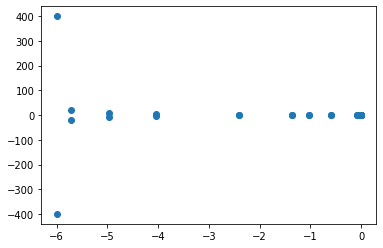

In [ ]:
lim=[];lim.append(limit(expr, a, 0, '-').doit());lim.append(limit(expr, a, 0, '+').doit());lim.append(limit(expr, a, oo, '-').doit());lim.append(limit(expr, a, oo, '+').doit());print("ΣΗΜΑΝΤΙΚΑ ΟΡΙΑ:\nlimG(ω->0-) =",lim[0],", Arg = ",sp.arg(lim[0]));print("limG(ω->0+) =",lim[1],", Arg = ",sp.arg(lim[1]));print("limG(ω->inf-) =",lim[2],", Arg = ",sp.arg(lim[2]));print("limG(ω->inf+) =",lim[3],", Arg = ",sp.arg(lim[3]));print("\n\nRANDOM ΟΡΙΑ:");xi = [];yi = []
for val in [0.005,0.1,0.2,0.3,0.5,0.7,0.8,1,2,3,4,5,6,7,8,9,100,1000,10000000,10000000000000000000000]:
# for val in [1,1.5,1.8,2,2.2,2.5,3,4,5,6,7,8,9,10,11,100,1000,100000,10000000,100000000000]:
  limNeg = sp.N(limit(expr, a, -val).doit(),3);limPos = sp.N(limit(expr, a, val).doit(),3);xi.append(re(limNeg));xi.append(re(limPos));yi.append(im(limNeg));yi.append(im(limPos));print(f"limG(ω->-{val}) =",limNeg,", Arg = ",sp.arg(limNeg));print(f"limG(ω->{val}) =",limPos,", Arg = ",sp.arg(limPos))
import matplotlib.pyplot as plt;plt.scatter(xi, yi);plt.show()

##Γράφημα


Για Niquist Plot καλύτερα στο https://www.wolframalpha.com/ και γράψε πχ"transfer function (s-1)/(s+1)(s-2)(s-3)"
ή άνοιξε Matlab. 

In [ ]:
# !pip install slycot
!pip install control

G(s) = 
          5
----------------------
s^3 + 6 s^2 + 11 s + 6



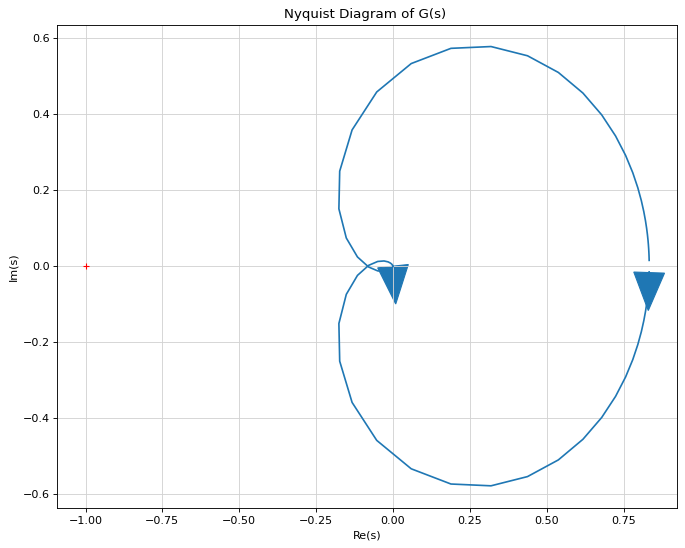

In [ ]:
arithmitis = 5
paronomastis = [1,6,11,6]
#Creating a transfer function G = arithmitis/paronomastis;
import control;import matplotlib.pyplot as plt;from matplotlib.pyplot import figure;figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k');G = control.tf(arithmitis,paronomastis) ;print("G(s) =",G);control.nyquist(G);plt.grid(True);plt.title(f'Nyquist Diagram of G(s) ');plt.xlabel('Re(s)');plt.ylabel('Im(s)');plt.show()

#Routh

In [ ]:
!pip install tbcontrol

In [ ]:
from tbcontrol.symbolic import routh
import sympy
K_c = sympy.Symbol('K_c') ; s = sympy.Symbol('s')
#------------------------------------------------#
ce = -s**2 +(6+K_c )*s -3          #   <- here is the poly
#------------------------------------------------#
A = routh(sympy.Poly(ce, s))
A

⎡  -1     -3⎤
⎢           ⎥
⎢K_c + 6  0 ⎥
⎢           ⎥
⎣  -3     0 ⎦

In [ ]:
# Negative
sp.solve([(e < 0) for e in A[:, 0]], K_c)

-∞ < K_c ∧ K_c < -6

In [ ]:
# Positive
sp.solve([(e > 0) for e in A[:, 0]], K_c)

#ΓΤΡ



##Σημεία θλάσης

In [ ]:
s = sp.symbols("s",real=True)

G = 1/(s(s**2+6*s+10))

k = -1/G
dk =sp.simplify(sp.diff(k,s).doit())
n,d = fraction(dk)
print("(G,k,  dk/ds, Αριθμητης) =");G,k,dk,n

(G,k,  dk/ds, Αριθμητης) =


⎛       1            ⎛ 2           ⎞             ⎛ d        ⎞│                
⎜────────────────, -s⎝s  + 6⋅s + 10⎠, -2⋅(s + 3)⋅⎜───(s(ξ₁))⎟│    2           
⎜ ⎛ 2           ⎞                                ⎝dξ₁       ⎠│ξ₁=s  + 6⋅s + 10
⎝s⎝s  + 6⋅s + 10⎠                                                             

             ⎛ d        ⎞│                ⎞
, -2⋅(s + 3)⋅⎜───(s(ξ₁))⎟│    2           ⎟
             ⎝dξ₁       ⎠│ξ₁=s  + 6⋅s + 10⎟
                                          ⎠

In [ ]:
# sol = sp.powsimp(sp.solveset(dk,s));print("Υποψηφια Σημεία Θλάσης:"); sol
sp.solve(n,s,simplify=True,check=True)

⎡                ⎛                 3 _______________⎞ 3 _______________       
⎢-4 + (1 - √3⋅ⅈ)⋅⎝14 + (-1 + √3⋅ⅈ)⋅╲╱ 12⋅√327 + 217 ⎠⋅╲╱ 12⋅√327 + 217   -4 + 
⎢──────────────────────────────────────────────────────────────────────, ─────
⎢                                 3 _______________                           
⎣                   12⋅(1 - √3⋅ⅈ)⋅╲╱ 12⋅√327 + 217                            

           ⎛                3 _______________⎞ 3 _______________              
(1 + √3⋅ⅈ)⋅⎝14 - (1 + √3⋅ⅈ)⋅╲╱ 12⋅√327 + 217 ⎠⋅╲╱ 12⋅√327 + 217            1  
────────────────────────────────────────────────────────────────, ────────────
                            3 _______________                       3 ________
              12⋅(1 + √3⋅ⅈ)⋅╲╱ 12⋅√327 + 217                      6⋅╲╱ 12⋅√327

              3 _______________⎤
          7   ╲╱ 12⋅√327 + 217 ⎥
─────── + ─ + ─────────────────⎥
_______   6           6        ⎥
 + 217                         ⎦

In [ ]:
ki = []
for i,item in enumerate(sol):
  temp =k.subs({s:item}) ; sp.simplify(temp).doit();  ki.append(temp)
sp.simplify(ki)

[]

##Γράφημα

Για ΓΤΡ γραφημα καλύτερα στο https://www.wolframalpha.com/ και γράψε πχ"transfer function (s-1)/(s+1)(s-2)(s-3)" ή Matlab

In [ ]:
import control
from matplotlib import pyplot as plt
%matplotlib inline

Συνάρτηση μεταφορας:

In [ ]:
# Transfer function
s = control.tf([ 1,0], [1,0,-2])
print(s)


   s
-------
s^2 - 2



In [ ]:
def rlocus(order, tau_p, K):
    Gp = 1/(tau_p*s + 1)**order
    Gc = 1

    L = Gp*Gc
    CL = K*L/(1 + K*L)
    control.root_locus(L);
    control.pzmap(CL)
    plt.title('')
from ipywidgets import interact
interact(rlocus, order=(1, 5), tau_p=(0.1, 2.), tau_i=(1., 20), K=(0.01, 200))

---